In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import time
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Current location
CURRENT_LOCATION = (-33.9693, 151.0697)
PROXIMITY = 10       # in kilometres
SIX_MONTHS_AGO = pd.to_datetime(time.time() - 86400 * 120, unit='s')

# Functions
def distance_calculator(first, second):
    """
    Calculates the distance between the first point and the second point.
    First and second must be in the form of a tuple (x, y)
    The inputs should be in degrees as the function will convert it to radians
    Output is in kilometres
    """
    first = (math.radians(first[0]), math.radians(first[1]))
    second = (math.radians(second[0]), math.radians(second[1]))
    return 6371.01 * math.acos(math.sin(first[0])*math.sin(second[0]) + math.cos(first[0])*math.cos(second[0])*math.cos(first[1] - second[1]))

# Get data
all_data = pd.read_csv('data/interim/all_data_cleaned.csv')

In [2]:
# Data cleaning
print(time.time())
all_data['last_updated'] = pd.to_datetime(all_data['last_updated'], format='%Y-%m-%d %H:%M')
print(time.time())
all_data['date'] = all_data['last_updated'].dt.round(freq='D')

# Calculate distance to current location - calculated in kilometres
print(time.time())
all_data['distance'] = all_data[['loc_latitude', 'loc_longitude']].apply(lambda x: distance_calculator(CURRENT_LOCATION, x), axis=1)

# Data masks
print(time.time())
six_months_ago = all_data['date'] > SIX_MONTHS_AGO

1572931513.9728522
1572931515.0218995
1572931515.143852
1572931570.363879


In [3]:
# Descriptive statistics - number of recorded prices per day
all_data.pivot_table(index='date', values='price', aggfunc='count')

,price
date,
2016-08-01,2234
2016-08-02,3151
2016-08-03,3000
2016-08-04,3356
2016-08-05,2696
...,...
2019-10-24,2220
2019-10-25,2260
2019-10-26,2369


In [4]:
# Descriptive statistics - price descriptive statistics per fuel type
for fuel_type in all_data['fuel_type'].unique():
    print(f'Descriptive statistics for {fuel_type}')
    plot_data = all_data[all_data['fuel_type'] == fuel_type]
    plot_data = plot_data['price'].describe()
    print(plot_data)

Descriptive statistics for P98


count    605318.000000
mean        154.222757
std          15.393430
min          36.900000
25%         143.400000
50%         153.900000
75%         164.900000
max         999.900000
Name: price, dtype: float64

Descriptive statistics for U91


count    592142.000000
mean        134.313099
std          14.578341
min          14.400000
25%         123.900000
50%         133.900000
75%         144.700000
max         446.900000
Name: price, dtype: float64

Descriptive statistics for P95


count    476170.000000
mean        147.651866
std          15.213236
min          48.700000
25%         136.900000
50%         147.700000
75%         157.900000
max         236.900000
Name: price, dtype: float64

Descriptive statistics for DL


count    104362.000000
mean        139.406356
std          13.696870
min          73.900000
25%         128.900000
50%         139.900000
75%         149.900000
max         200.000000
Name: price, dtype: float64

Descriptive statistics for PDL


count    147460.000000
mean        139.966648
std          13.535644
min           1.100000
25%         128.500000
50%         140.700000
75%         149.900000
max         222.200000
Name: price, dtype: float64

Descriptive statistics for E10


count    642320.000000
mean        131.915206
std          14.645683
min          11.900000
25%         121.700000
50%         131.900000
75%         141.900000
max         229.900000
Name: price, dtype: float64

Descriptive statistics for LPG


count    34917.000000
mean        75.292992
std         11.056026
min          1.100000
25%         67.900000
50%         74.900000
75%         79.900000
max        999.900000
Name: price, dtype: float64

Descriptive statistics for E85


count    5909.000000
mean      127.750567
std        18.789778
min        75.900000
25%       113.900000
50%       131.900000
75%       139.900000
max       188.900000
Name: price, dtype: float64

Descriptive statistics for B20


count     14.000000
mean     137.557143
std       29.974597
min       55.900000
25%      130.400000
50%      143.900000
75%      159.400000
max      169.900000
Name: price, dtype: float64

Descriptive statistics for EV


count     59.000000
mean      27.859322
std       55.958707
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      155.500000
Name: price, dtype: float64

Descriptive statistics for LNG


count     1.0
mean     58.9
std       NaN
min      58.9
25%      58.9
50%      58.9
75%      58.9
max      58.9
Name: price, dtype: float64

Descriptive statistics for CNG


count     13.000000
mean      82.723077
std       15.494846
min       65.700000
25%       74.900000
50%       79.900000
75%       84.900000
max      128.000000
Name: price, dtype: float64

In [5]:
# Available fuel types
plot_data = all_data.pivot_table(index='fuel_type', values='price', aggfunc=['count', 'mean', 'std'])
plot_data = plot_data.sort_values(('count',  'price'), ascending=False)
formatter = '{:,.3f}'
plot_data = plot_data.style.format(formatter)
print(plot_data)

c:\python\python37\lib\site-packages\pandas\core\reshape\pivot.py:56: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(pieces, keys=keys, axis=1)


,count,mean,std
,price,price,price
E10,"642,320.000",131.915,14.646
P98,"605,318.000",154.223,15.393
U91,"592,142.000",134.313,14.578
P95,"476,170.000",147.652,15.213
PDL,"147,460.000",139.967,13.536
DL,"104,362.000",139.406,13.697
LPG,"34,917.000",75.293,11.056
E85,"5,909.000",127.751,18.790
EV,59.000,27.859,55.959


In [6]:
# Available fuel types
plot_data = all_data.pivot_table(index='fuel_type', values='price', aggfunc=['count', 'mean', 'std'])
plot_data = plot_data.sort_values(('count',  'price'), ascending=False)
formatter = {('count', 'price'): '{:,.0f}',
             ('mean', 'price'): '{:,.0f}',
             ('std', 'price'): '{:,.3f}',
            }
plot_data.style.format(formatter)

c:\python\python37\lib\site-packages\pandas\core\reshape\pivot.py:56: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(pieces, keys=keys, axis=1)


,count,mean,std
,price,price,price
E10,"642,320",132,14.646
P98,"605,318",154,15.393
U91,"592,142",134,14.578
P95,"476,170",148,15.213
PDL,"147,460",140,13.536
DL,"104,362",139,13.697
LPG,"34,917",75,11.056
E85,"5,909",128,18.790
EV,59,28,55.959


In [7]:
lower = all_data['price'].quantile(0.01)
upper = all_data['price'].quantile(0.99)

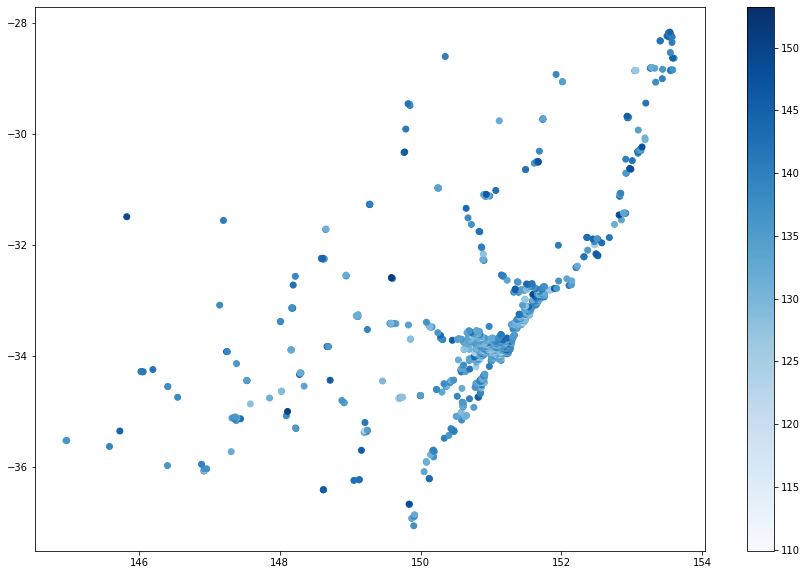

In [8]:
# Fuel price by geolocation
condition_1 = all_data['price'].between(lower, upper)
condition_2 = all_data['fuel_type'] == 'E10'
plot_data = all_data[condition_1 & condition_2]
plot_data = plot_data.pivot_table(index=['loc_latitude', 'loc_longitude'], values='price', aggfunc='mean').reset_index()
plt.figure(figsize=(15, 10))
plt.scatter(plot_data['loc_longitude'], plot_data['loc_latitude'], c=plot_data['price'], cmap='Blues')
plt.colorbar()

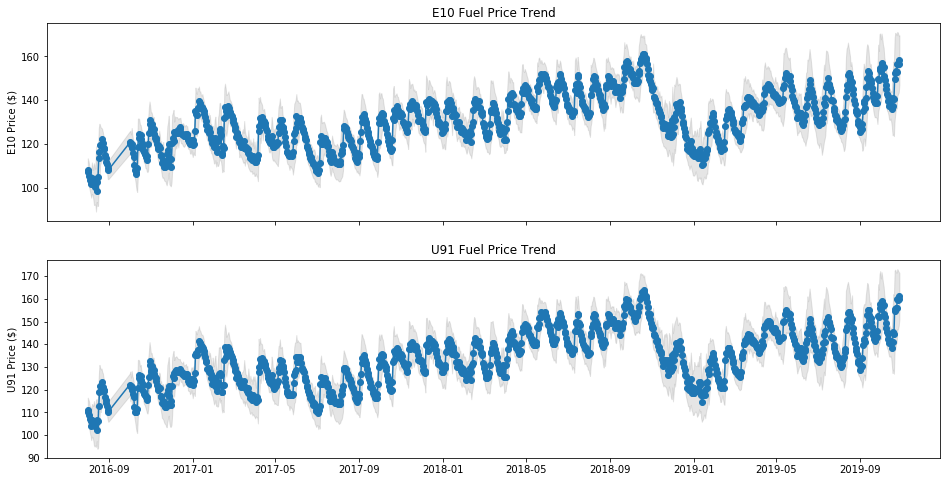

In [9]:
fuel_types = ['E10', 'U91']

fig, axes = plt.subplots(len(fuel_types), 1, sharex=True, figsize=(16, 8))
months = mdates.MonthLocator()
days = mdates.DayLocator()
for i, fuel_type in enumerate(fuel_types):
    plot_data = all_data[all_data['fuel_type'] == fuel_type]
    plot_data = plot_data.pivot_table(index=['date'], values='price', aggfunc=['mean', 'std', 'count'])
    plot_data.columns = plot_data.columns.droplevel(1)
    plot_data['upper'] = plot_data['mean'] + plot_data['std']
    plot_data['lower'] = plot_data['mean'] - plot_data['std']
    axes[i].set_ylabel(f'{fuel_type} Price ($)')
    axes[i].plot(plot_data.index, plot_data['mean'], marker='o')
    axes[i].fill_between(plot_data.index, plot_data['lower'], plot_data['upper'], color='grey', alpha=0.2)
    axes[i].set_title(f'{fuel_type} Fuel Price Trend')

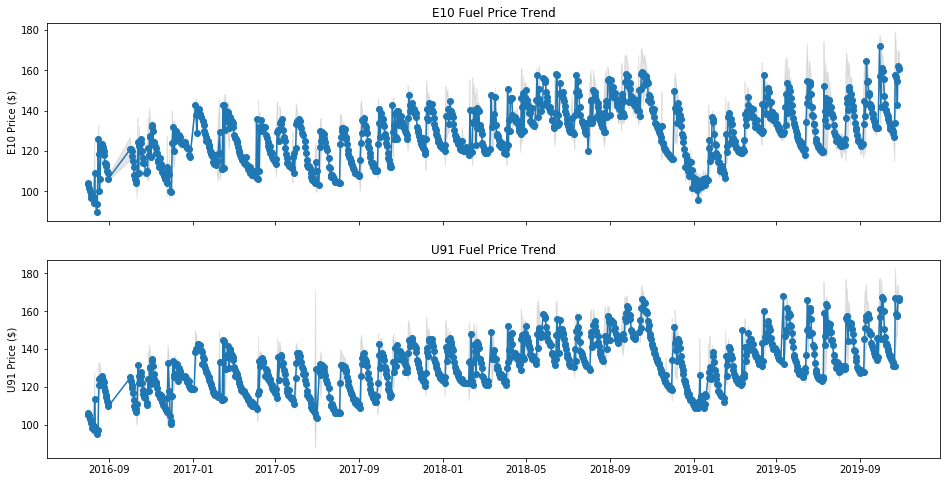

In [10]:
# Recent trend of the nearest stations
%matplotlib inline
max_distance = 3
fuel_types = ['E10', 'U91']

nearest_stations = all_data[all_data['distance'] < max_distance]
fig, axes = plt.subplots(len(fuel_types), 1, sharex=True, figsize=(16, 8))
months = mdates.MonthLocator()
days = mdates.DayLocator()
for i, fuel_type in enumerate(fuel_types):
    plot_data = nearest_stations[nearest_stations['fuel_type'] == fuel_type]
    plot_data = plot_data.pivot_table(index=['date'], values='price', aggfunc=['mean', 'std', 'count'])
    plot_data.columns = plot_data.columns.droplevel(1)
    plot_data['upper'] = plot_data['mean'] + plot_data['std']
    plot_data['lower'] = plot_data['mean'] - plot_data['std']
    axes[i].set_ylabel(f'{fuel_type} Price ($)')
    axes[i].plot(plot_data.index, plot_data['mean'], marker='o')
    axes[i].fill_between(plot_data.index, plot_data['lower'], plot_data['upper'], color='grey', alpha=0.2)
    axes[i].set_title(f'{fuel_type} Fuel Price Trend')

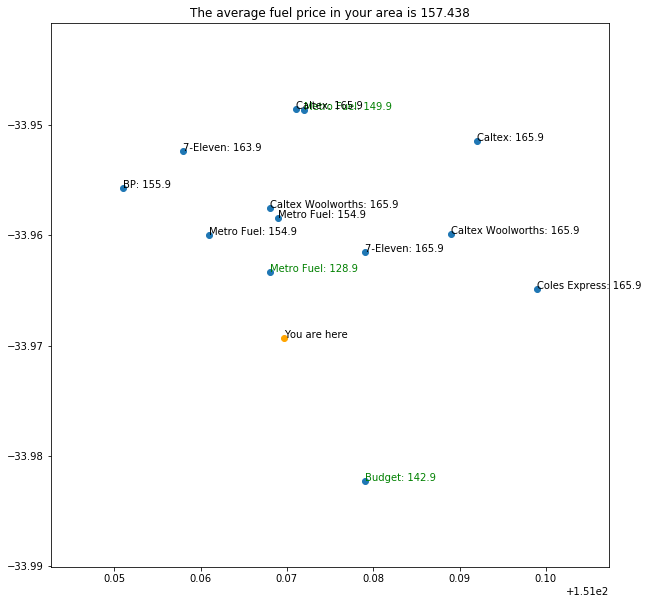

In [11]:
# Plot nearby fuels
max_distance = 3
fuel_type = 'E10'

nearest_stations = all_data[all_data['distance'] < max_distance]
nearest_stations = nearest_stations[nearest_stations['fuel_type'] == fuel_type]
latest_price_table = nearest_stations.pivot_table(index='station_code', values='last_updated', aggfunc='max').reset_index()

latest_price = pd.merge(nearest_stations, latest_price_table, how='right', left_on=['station_code', 'last_updated'], 
                        right_on=['station_code', 'last_updated'])
latest_price = latest_price.sort_values('price', ascending=True).reset_index()
average = latest_price['price'].mean()

plt.figure(figsize=(10, 10))
plt.scatter(latest_price['loc_longitude'], latest_price['loc_latitude'])
plt.scatter(CURRENT_LOCATION[1], CURRENT_LOCATION[0], c='orange')
plt.text(CURRENT_LOCATION[1], CURRENT_LOCATION[0], s='You are here')
for i in range(len(latest_price)):
    if i < 3:
        colour = 'green'
    else:
        colour = 'black'
    label = f"{latest_price['brand'][i]}: {latest_price['price'][i]}"
    plt.text(latest_price['loc_longitude'][i], latest_price['loc_latitude'][i], s=label, c=colour)
plt.title(f'The average fuel price in your area is {round(average, 3)}');

In [14]:
label = f"{latest_price['price'][i]} {latest_price['brand'][i]}"

In [15]:
latest_price[['address', 'price', 'last_updated', 'distance']].head(5)

,address,price,last_updated,distance
0,"114 Boundary Rd, PEAKHURST NSW 2210",128.9,2019-10-21 04:55:55,0.685343
1,"12B Oatley Parade, Oatley NSW 2223",142.9,2019-10-25 05:14:32,1.680771
2,"32 Bryant St, NARWEE NSW 2209",149.9,2019-10-27 17:59:59,2.311493
3,"637 Forest Rd, PEAKHURST NSW 2210",154.9,2019-10-23 14:57:44,1.213745
4,"836 Forest Road, Peakhurst NSW 2100",154.9,2019-10-23 15:46:44,1.308872
